In [1]:
!git clone https://github.com/Atharva-Malode/ML-Bootcamp.git

Cloning into 'ML-Bootcamp'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 425 (delta 103), reused 155 (delta 68), pack-reused 193
Receiving objects: 100% (425/425), 8.68 MiB | 11.46 MiB/s, done.
Resolving deltas: 100% (144/144), done.


In [2]:
!pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df = pd.read_csv("/content/ML-Bootcamp/Week-3/Day-1/Dataset/SMSSpamCollection.txt", sep="\t", names = ['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df.shape

(5572, 2)

data cleaning

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
sn = SnowballStemmer("english")
stop = set(stopwords.words("english"))

In [48]:
def clean_text(sms):
  sms = sms.lower()
  sms = re.sub("[^a-z]",' ',sms)
  sms = nltk.word_tokenize(sms)
  sms = [t for t in sms if len(t)>1]
  sms = [sn.stem(word) for word in sms if word not in stop]
  sms = ' '.join(sms)

  return sms

In [49]:
clean_text("Get this stuff for free  just Rs.10 a c")

'get stuff free rs'

In [35]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [51]:
df['clean_text'] = df['text'].apply(clean_text)

In [52]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


Wordcloud

In [53]:
from wordcloud import WordCloud

In [55]:
hamdata = df[df['label']== 'ham']
hamdata = hamdata['clean_text']


In [60]:
def wordCloud(data):
  words = ' '.join(data)
  wc = WordCloud(background_color='black')
  wc = wc.generate(words)

  plt.figure(figsize= (10,8))
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

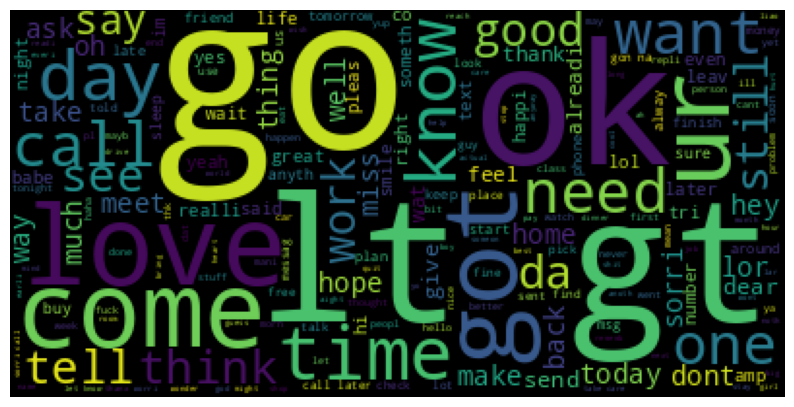

In [61]:
wordCloud(hamdata)

In [62]:
spamdata = df[df['label']== 'spam']
spamdata = spamdata['clean_text']

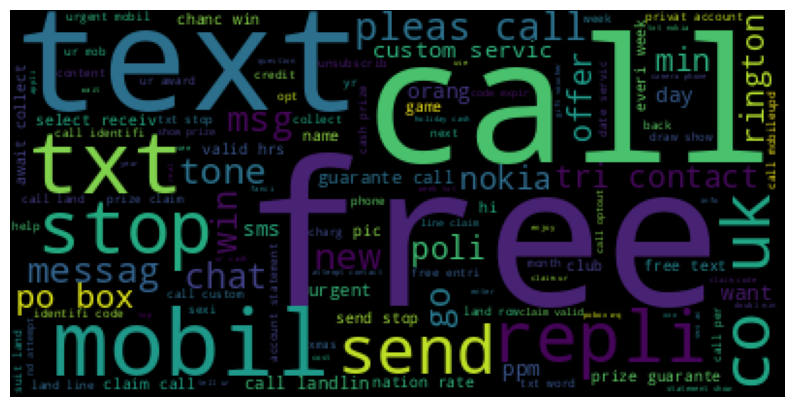

In [63]:
wordCloud(spamdata)

featurization

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
cv = CountVectorizer(max_features = 5000)

In [69]:
X = cv.fit_transform(df['clean_text']).toarray()

In [70]:
X.shape

(5572, 5000)

In [71]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [87]:
y = pd.get_dummies(df['label'])
y = y['spam'].values

In [88]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

Model Building

In [77]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [90]:
from sklearn.naive_bayes import MultinomialNB

In [91]:
model = MultinomialNB()

In [97]:
model.fit(X_train, y_train)

MultinomialNB()

In [98]:
y_pred = model.predict(X_test)

In [99]:
y_test, y_pred

(array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8))

In [102]:
pd.DataFrame({'Actual': y_test, 'predicted': y_pred}).head(10)

,Actual,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [100]:
print("Accuracy on training dara :")
print(model.score(X_train, y_train))

Accuracy on training dara :
0.990892043932494


In [101]:
print("Accuracy on Testing Data")
print(model.score(X_test, y_test))

Accuracy on Testing Data
0.9847743338771071
